In [3]:
!unzip "/content/book-price-prediction-cs-sbu (2).zip"

Archive:  /content/book-price-prediction-cs-sbu (2).zip
  inflating: Data_Train.xlsx         
  inflating: test.xlsx               


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




excel_file_path = '/content/Data_Train.xlsx'
data = pd.read_excel(excel_file_path)
excel_file_path_test = '/content/test.xlsx'
test = pd.read_excel(excel_file_path_test)



In [5]:
print(data.head())

                                        Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition             Reviews              Ratings  \
0  Paperback,– 10 Mar 2016  4.0 out of 5 stars   8 customer reviews   
1   Paperback,– 7 Nov 2012  3.9 out of 5 stars  14 customer reviews   
2  Paperback,– 25 Feb 1982  4.8 out of 5 stars   6 customer reviews   
3   Paperback,– 5 Oct 2017  4.1 out of 5 stars  13 customer reviews   
4  Hardcover,– 10 Oct 2006  5.0 out of 5 stars    1 customer review   

                                            Synopsis  \
0  THE HUNTERS return in their third brilliant no...   
1  A layered portrait of a troubled genius for wh...   
2  "Duri

In [6]:
print(test.head())

   Unnamed: 0                                              Title  \
0           0                Portrait Of A Director:satyajit Ray   
1           1  More Mindfulness Colouring: More Anti-stress A...   
2           2  Palace of Treason: Discover what happens next ...   
3           3      A History of Political Thought: Plato to Marx   
4           4  Homer Kelley's Golfing Machine: The Curious Qu...   

           Author                          Edition             Reviews  \
0     Marie Seton          Paperback,– 19 Jun 2003  4.8 out of 5 stars   
1  Emma Farrarons  Paperback,– Import, 24 Sep 2015  3.9 out of 5 stars   
2  Jason Matthews          Paperback,– 21 Apr 2016  3.3 out of 5 stars   
3       Mukherjee                 Paperback,– 2011  3.8 out of 5 stars   
4    Scott Gummer           Paperback,– 4 May 2010  4.0 out of 5 stars   

               Ratings                                           Synopsis  \
0  10 customer reviews  The definitive study of the life and work of 

In [7]:
 test ['Price']=test ["Unnamed: 0"]
 test=test.drop(columns=['Unnamed: 0'])

In [8]:
df = pd.concat([test.assign(ind="test"), data.assign(ind="data")])

In [9]:
#  test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 0 to 5698
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6236 non-null   object 
 1   Author        6236 non-null   object 
 2   Edition       6236 non-null   object 
 3   Reviews       6236 non-null   object 
 4   Ratings       6236 non-null   object 
 5   Synopsis      6236 non-null   object 
 6   Genre         6236 non-null   object 
 7   BookCategory  6236 non-null   object 
 8   Price         6236 non-null   float64
 9   ind           6236 non-null   object 
dtypes: float64(1), object(9)
memory usage: 535.9+ KB


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         537 non-null    object
 1   Author        537 non-null    object
 2   Edition       537 non-null    object
 3   Reviews       537 non-null    object
 4   Ratings       537 non-null    object
 5   Synopsis      537 non-null    object
 6   Genre         537 non-null    object
 7   BookCategory  537 non-null    object
 8   Price         537 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 37.9+ KB


In [13]:
data.describe()

,Price
count,5699.000000
mean,554.857428
std,674.363427
min,25.000000
25%,249.000000
50%,373.000000
75%,599.000000
max,14100.000000


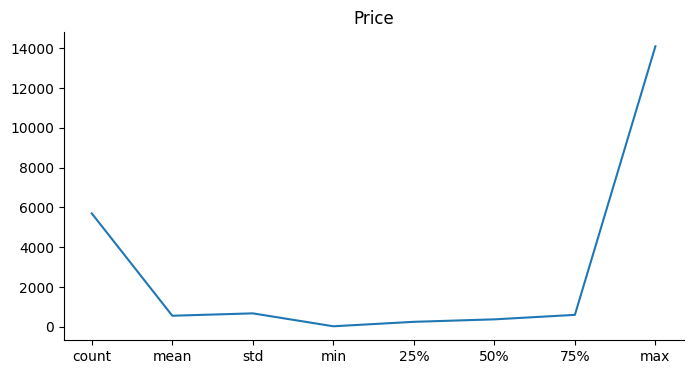

In [14]:

data.describe()['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [16]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography",0
1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",1
2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery",2
3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Political Ideologies (Books),Politics,3
4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports,4


In [17]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,ind
0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography",0.0,test
1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",1.0,test
2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery",2.0,test
3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Political Ideologies (Books),Politics,3.0,test
4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports,4.0,test


In [18]:
len(df['Author'].unique())

3678

In [19]:
len(data['Author'].unique())

3438

In [20]:
len(test['Author'].unique())

474

In [21]:
len(df['BookCategory'].unique())

11

In [22]:
len(data['BookCategory'].unique())

11

In [23]:
len(test['BookCategory'].unique())

11

In [24]:
len(df['Genre'].unique())

345

In [25]:
len(data['Genre'].unique())

335

In [26]:
len(test['Genre'].unique())

129

In [27]:
df['auth_genre_title_Edition']=df['Author']+' '+ df ['Genre'] + ' '+ df['Title']+' '+ df['Edition']

In [28]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,ind,auth_genre_title_Edition
0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography",0.0,test,Marie Seton Biographies & Autobiographies (Boo...
1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",1.0,test,"Emma Farrarons Handicrafts, Decorative Arts & ..."
2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery",2.0,test,Jason Matthews Action & Adventure (Books) Pala...
3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Political Ideologies (Books),Politics,3.0,test,Mukherjee Political Ideologies (Books) A Histo...
4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...


In [29]:
df=df.drop(columns=['Author','Genre','Title','Edition'])

In [30]:
df.head()

,Reviews,Ratings,Synopsis,BookCategory,Price,ind,auth_genre_title_Edition
0,4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,"Arts, Film & Photography",0.0,test,Marie Seton Biographies & Autobiographies (Boo...
1,3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Arts, Film & Photography",1.0,test,"Emma Farrarons Handicrafts, Decorative Arts & ..."
2,3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,"Crime, Thriller & Mystery",2.0,test,Jason Matthews Action & Adventure (Books) Pala...
3,3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Politics,3.0,test,Mukherjee Political Ideologies (Books) A Histo...
4,4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...


In [31]:
len(df[df['Reviews'].str.contains('out of 5 stars')])

6236

In [32]:
df['Reviews']=  df['Reviews'].str[:4].astype(float)

In [33]:
df['Reviews']

0       4.8
1       3.9
2       3.3
3       3.8
4       4.0
       ... 
5694    4.9
5695    4.1
5696    4.1
5697    1.0
5698    4.5
Name: Reviews, Length: 6236, dtype: float64

In [34]:
df['Reviews'].describe()

count    6236.000000
mean        4.293089
std         0.662494
min         1.000000
25%         4.000000
50%         4.400000
75%         4.800000
max         5.000000
Name: Reviews, dtype: float64

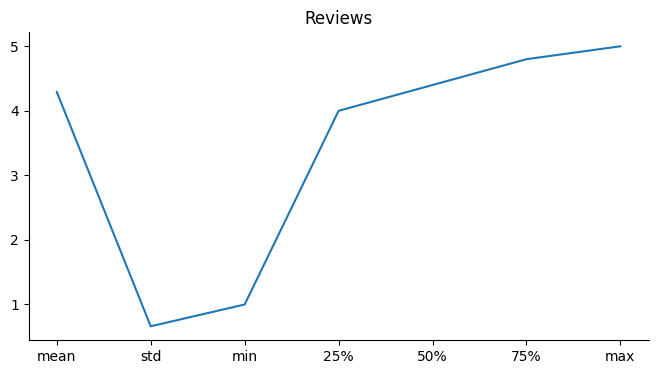

In [35]:

df.describe()['Reviews'][1:].plot(kind='line', figsize=(8, 4), title='Reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

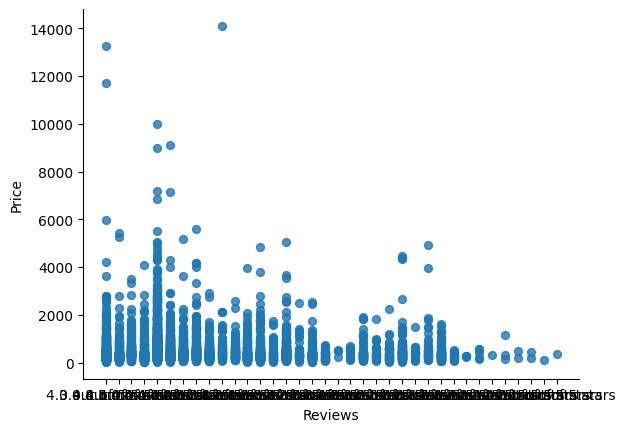

In [36]:


data.plot(kind='scatter', x='Reviews', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
len(df[df['Ratings'].str.contains('customer reviews')])

5197

In [38]:
df[df['Ratings'].str.contains('customer reviews')==False]

,Reviews,Ratings,Synopsis,BookCategory,Price,ind,auth_genre_title_Edition
4,4.0,1 customer review,The remarkable true story of a lone genius who...,Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...
5,5.0,1 customer review,An assassination attempt on the President of t...,Action & Adventure,5.0,test,Colin Forbes Action & Adventure (Books) The St...
14,1.0,1 customer review,"Learn from the AWS subject-matter experts, app...","Computing, Internet & Digital Media",14.0,test,Gabriel Ramirez Computer Science Books AWS Cer...
16,5.0,1 customer review,"In the winter of 1946, somenath hore, one of I...",Politics,16.0,test,Somnath Hore Political Structure & Processes (...
25,5.0,1 customer review,With the BJP in power at the Centre since 2014...,Politics,25.0,test,Kingshuk Nag Political Ideologies (Books) Moha...
...,...,...,...,...,...,...,...
5657,3.0,1 customer review,If you're a programmer or database administrat...,"Computing, Internet & Digital Media",225.0,data,"Jonathan Gennick Computing, Internet & Digital..."
5669,4.0,1 customer review,Geralt the Witcher-revered and hated-holds the...,Action & Adventure,1398.0,data,Andrzej Sapkowski Action & Adventure (Books) S...
5673,5.0,1 customer review,The perfect book for anyone who wants to learn...,"Language, Linguistics & Writing",383.0,data,DK Language Learning & Teaching (Books) 15 Min...
5684,4.0,1 customer review,Guitar Exercises For Dummies includes over 300...,"Arts, Film & Photography",1159.0,data,Mark Phillips Music Books Guitar Exercises For...


In [39]:
len(df[df['Ratings'].str.contains('customer review')])

6236

In [40]:
df['Ratings']=df['Ratings'].str.replace('customer review','').str.replace('s' , '').str.replace(',','').astype(float)
df.head()

,Reviews,Ratings,Synopsis,BookCategory,Price,ind,auth_genre_title_Edition
0,4.8,10.0,The definitive study of the life and work of I...,"Arts, Film & Photography",0.0,test,Marie Seton Biographies & Autobiographies (Boo...
1,3.9,6.0,"Take a few more minutes out of your day, where...","Arts, Film & Photography",1.0,test,"Emma Farrarons Handicrafts, Decorative Arts & ..."
2,3.3,3.0,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,"Crime, Thriller & Mystery",2.0,test,Jason Matthews Action & Adventure (Books) Pala...
3,3.8,74.0,This book presents a study in political tradit...,Politics,3.0,test,Mukherjee Political Ideologies (Books) A Histo...
4,4.0,1.0,The remarkable true story of a lone genius who...,Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...


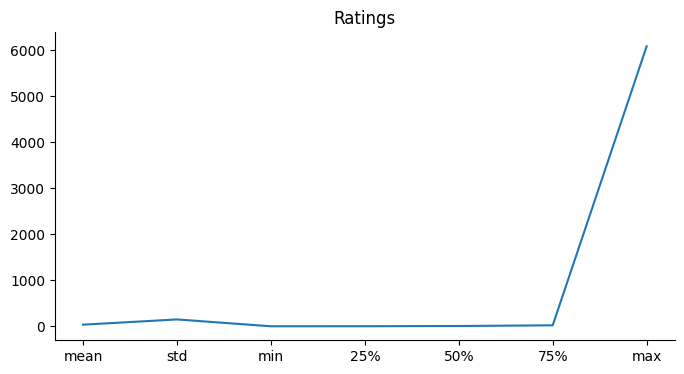

In [41]:

df.describe()['Ratings'][1:].plot(kind='line', figsize=(8, 4), title='Ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

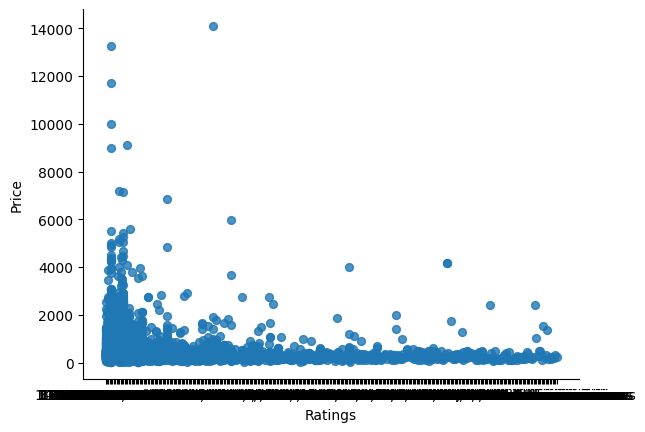

In [42]:



data.plot(kind='scatter', x='Ratings', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
df_fast=df.copy()
df_bert=df.copy()
df_count=df.copy()

In [44]:
!pip install nltk
!pip install gensim

In [45]:


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:


def my_vectorizer(data_column,max_features=500):
  vectorizer = CountVectorizer(max_features=max_features,stop_words='english')
  vector_col= vectorizer.fit_transform(data_column)
  vector_col.shape
  return (vector_col.toarray())

In [47]:
df_count['Synopsis_Vec'] = my_vectorizer(df_count['Synopsis']).tolist()

df_count['auth_genre_title_Edition_Vec'] = my_vectorizer(df_count['auth_genre_title_Edition']).tolist()

df_count['BookCategory_Vec'] = my_vectorizer(df_count['BookCategory']).tolist()

In [48]:
df_count

,Reviews,Ratings,Synopsis,BookCategory,Price,ind,auth_genre_title_Edition,Synopsis_Vec,auth_genre_title_Edition_Vec,BookCategory_Vec
0,4.8,10.0,The definitive study of the life and work of I...,"Arts, Film & Photography",0.0,test,Marie Seton Biographies & Autobiographies (Boo...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,3.9,6.0,"Take a few more minutes out of your day, where...","Arts, Film & Photography",1.0,test,"Emma Farrarons Handicrafts, Decorative Arts & ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,3.3,3.0,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,"Crime, Thriller & Mystery",2.0,test,Jason Matthews Action & Adventure (Books) Pala...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,3.8,74.0,This book presents a study in political tradit...,Politics,3.0,test,Mukherjee Political Ideologies (Books) A Histo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4.0,1.0,The remarkable true story of a lone genius who...,Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
5694,4.9,9.0,“Laugh your way to enlightenment” with this in...,Humour,1009.0,data,Ajahn Brahm Buddhism (Books) Who Ordered This ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
5695,4.1,2.0,'The most important book about our economy and...,Politics,781.0,data,Paul Mason Macroeconomics Textbooks PostCapita...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5696,4.1,28.0,The Chinese government has been keeping a secr...,"Crime, Thriller & Mystery",449.0,data,Matthew Reilly Action & Adventure (Books) The ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
5697,1.0,1.0,Mike Engleby has a secret...\n\nThis is the st...,"Crime, Thriller & Mystery",108.0,data,Sebastian Faulks Contemporary Fiction (Books) ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [49]:
df_fast.head()

,Reviews,Ratings,Synopsis,BookCategory,Price,ind,auth_genre_title_Edition
0,4.8,10.0,The definitive study of the life and work of I...,"Arts, Film & Photography",0.0,test,Marie Seton Biographies & Autobiographies (Boo...
1,3.9,6.0,"Take a few more minutes out of your day, where...","Arts, Film & Photography",1.0,test,"Emma Farrarons Handicrafts, Decorative Arts & ..."
2,3.3,3.0,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,"Crime, Thriller & Mystery",2.0,test,Jason Matthews Action & Adventure (Books) Pala...
3,3.8,74.0,This book presents a study in political tradit...,Politics,3.0,test,Mukherjee Political Ideologies (Books) A Histo...
4,4.0,1.0,The remarkable true story of a lone genius who...,Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...


In [50]:
df_count=df_count.drop(columns=['Synopsis','BookCategory','auth_genre_title_Edition',])

In [51]:
df_count.head()

,Reviews,Ratings,Price,ind,Synopsis_Vec,auth_genre_title_Edition_Vec,BookCategory_Vec
0,4.8,10.0,0.0,test,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,3.9,6.0,1.0,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,3.3,3.0,2.0,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,3.8,74.0,3.0,test,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4.0,1.0,4.0,test,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [52]:
! pip install fasttext
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246764 sha256=e779e519dfc54695490de4c1ecca1240890d2e8505844f6510159ea9533dd7e0
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext
--2024-07-13 20:57:14--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.239.50.9, 18.239.50.18, 18.239.50.104, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.239.50.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

In [53]:
import fasttext.util
ft = fasttext.load_model('cc.en.300.bin')

In [54]:
df_fast['Synopsis']=df_fast['Synopsis'].str.replace('\n','')

df_fast['Synopsis_fast']=df_fast["Synopsis"].apply(ft.get_sentence_vector)


In [55]:
df_fast['BookCategory']=df_fast['BookCategory'].str.replace('\n','')

df_fast['BookCategory_fast']=df_fast["BookCategory"].apply(ft.get_sentence_vector)


In [56]:

df_fast['auth_genre_title_Edition']=df_fast['auth_genre_title_Edition'].str.replace('\n','')

df_fast['auth_genre_title_Edition_fast']=df_fast["auth_genre_title_Edition"].apply(ft.get_sentence_vector)



In [57]:
df_fast.head()

,Reviews,Ratings,Synopsis,BookCategory,Price,ind,auth_genre_title_Edition,Synopsis_fast,BookCategory_fast,auth_genre_title_Edition_fast
0,4.8,10.0,The definitive study of the life and work of I...,"Arts, Film & Photography",0.0,test,Marie Seton Biographies & Autobiographies (Boo...,"[-0.007989927, 0.0029771049, 0.0023689116, 0.0...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[0.00058930967, 0.00994793, -0.019527754, -0.0..."
1,3.9,6.0,"Take a few more minutes out of your day, where...","Arts, Film & Photography",1.0,test,"Emma Farrarons Handicrafts, Decorative Arts & ...","[-0.00870873, 0.0018814863, 0.005123114, 0.047...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[-0.0026203818, 0.039559606, 0.00071187527, 0...."
2,3.3,3.0,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,"Crime, Thriller & Mystery",2.0,test,Jason Matthews Action & Adventure (Books) Pala...,"[-0.0030442881, -0.010968978, 0.0071070925, 0....","[-0.033171736, -0.007671427, 0.012315496, -0.0...","[-0.0077426503, 0.031183094, 0.015361733, -0.0..."
3,3.8,74.0,This book presents a study in political tradit...,Politics,3.0,test,Mukherjee Political Ideologies (Books) A Histo...,"[-0.02009091, 0.008555291, 0.0049952217, 0.023...","[-0.026948648, 0.06637903, 0.060023952, -0.070...","[-0.010761345, 0.013750795, -0.014758068, -0.0..."
4,4.0,1.0,The remarkable true story of a lone genius who...,Sports,4.0,test,Scott Gummer Baseball (Books) Homer Kelley's G...,"[-0.0016213441, 0.000104798535, -0.0010507597,...","[0.0025677015, 0.16749848, 0.005761036, -0.134...","[0.013213352, 0.045381058, 0.008633208, 0.0094..."


In [58]:
df_fast=df_fast.drop(columns=['Synopsis','BookCategory','auth_genre_title_Edition',])

In [59]:
df_fast.head()

,Reviews,Ratings,Price,ind,Synopsis_fast,BookCategory_fast,auth_genre_title_Edition_fast
0,4.8,10.0,0.0,test,"[-0.007989927, 0.0029771049, 0.0023689116, 0.0...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[0.00058930967, 0.00994793, -0.019527754, -0.0..."
1,3.9,6.0,1.0,test,"[-0.00870873, 0.0018814863, 0.005123114, 0.047...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[-0.0026203818, 0.039559606, 0.00071187527, 0...."
2,3.3,3.0,2.0,test,"[-0.0030442881, -0.010968978, 0.0071070925, 0....","[-0.033171736, -0.007671427, 0.012315496, -0.0...","[-0.0077426503, 0.031183094, 0.015361733, -0.0..."
3,3.8,74.0,3.0,test,"[-0.02009091, 0.008555291, 0.0049952217, 0.023...","[-0.026948648, 0.06637903, 0.060023952, -0.070...","[-0.010761345, 0.013750795, -0.014758068, -0.0..."
4,4.0,1.0,4.0,test,"[-0.0016213441, 0.000104798535, -0.0010507597,...","[0.0025677015, 0.16749848, 0.005761036, -0.134...","[0.013213352, 0.045381058, 0.008633208, 0.0094..."


In [60]:
#!pip install transformers


In [61]:
# import torch
# from transformers import BertTokenizer, BertModel
# from torch.utils.data import DataLoader, TensorDataset
# from tqdm import tqdm

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# def generate_embeddings( model ,sentences ):
#     model.eval()
#     all_embeddings = []

#     inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
#     batch_size = 10
#     dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
#     dataloader = DataLoader(dataset, batch_size=batch_size)

#     with torch.no_grad():
#         for batch in tqdm(dataloader):
#             input_ids, attention_mask = batch
#             outputs = model(input_ids, attention_mask=attention_mask)
#             embeddings = outputs.last_hidden_state
#             all_embeddings.append(embeddings)

#     return torch.cat(all_embeddings, dim=0)

# df_bert['Synopsis_bert'] = generate_embeddings( model,df_bert['Synopsis'].tolist()).toarry()
# df_bert['BookCategory_bert'] = generate_embeddings( model,df_bert['BookCategory'].tolist()).toarry()
# df_bert['auth_genre_title_Edition_bert'] = generate_embeddings( model,df_bert['Synopsis'].tolist()).toarry()
# print(f"Shape of Word Embeddings: {word_embeddings.shape}")

In [62]:
df_bert=df_bert.drop(columns=['Synopsis','BookCategory','auth_genre_title_Edition',])

In [63]:
df_bert.head()

,Reviews,Ratings,Price,ind
0,4.8,10.0,0.0,test
1,3.9,6.0,1.0,test
2,3.3,3.0,2.0,test
3,3.8,74.0,3.0,test
4,4.0,1.0,4.0,test


In [64]:
test_fast, data_fast = df_fast[df_fast["ind"].eq("test")], df_fast[df_fast["ind"].eq("data")]
test_count, data_count = df_count[df_count["ind"].eq("test")], df_count[df_count["ind"].eq("data")]
#test_bert, data_bert = df_bert[df_bert["ind"].eq("test")], df_bert[df_bert["ind"].eq("data")]


In [65]:
data_fast.head()

,Reviews,Ratings,Price,ind,Synopsis_fast,BookCategory_fast,auth_genre_title_Edition_fast
0,4.0,8.0,220.00,data,"[-0.010859959, 0.014361118, -0.0014607132, 0.0...","[0.013695705, 0.00025105974, -0.028497603, -0....","[-0.021627206, 0.038583707, -0.008873373, -0.0..."
1,3.9,14.0,202.93,data,"[-0.014604872, -0.008602337, 0.005366141, 0.03...","[0.009960002, -0.025606766, -0.022620963, -0.0...","[-0.009157502, -0.0018528796, 0.0095431125, -0..."
2,4.8,6.0,299.00,data,"[-0.017453022, -0.004596445, 0.00072728156, 0....","[0.09495672, 0.01833967, -0.014529375, -0.0314...","[-0.023945918, 0.039772995, -0.013313749, 0.01..."
3,4.1,13.0,180.00,data,"[-0.004608298, 0.005224399, 0.00084110623, 0.0...","[-0.033171736, -0.007671427, 0.012315496, -0.0...","[-0.0085748555, 0.017129658, -0.019947717, -0...."
4,5.0,1.0,965.62,data,"[-0.008268768, 0.0074038105, -0.02305045, 0.03...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[0.024407335, 0.040214073, -0.010480035, -0.05..."


In [66]:
test_fast.head()

,Reviews,Ratings,Price,ind,Synopsis_fast,BookCategory_fast,auth_genre_title_Edition_fast
0,4.8,10.0,0.0,test,"[-0.007989927, 0.0029771049, 0.0023689116, 0.0...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[0.00058930967, 0.00994793, -0.019527754, -0.0..."
1,3.9,6.0,1.0,test,"[-0.00870873, 0.0018814863, 0.005123114, 0.047...","[0.03885908, 0.013184043, 0.010051036, -0.0431...","[-0.0026203818, 0.039559606, 0.00071187527, 0...."
2,3.3,3.0,2.0,test,"[-0.0030442881, -0.010968978, 0.0071070925, 0....","[-0.033171736, -0.007671427, 0.012315496, -0.0...","[-0.0077426503, 0.031183094, 0.015361733, -0.0..."
3,3.8,74.0,3.0,test,"[-0.02009091, 0.008555291, 0.0049952217, 0.023...","[-0.026948648, 0.06637903, 0.060023952, -0.070...","[-0.010761345, 0.013750795, -0.014758068, -0.0..."
4,4.0,1.0,4.0,test,"[-0.0016213441, 0.000104798535, -0.0010507597,...","[0.0025677015, 0.16749848, 0.005761036, -0.134...","[0.013213352, 0.045381058, 0.008633208, 0.0094..."


In [67]:
data_fast=data_fast.drop(columns=['ind'])
test_fast=test_fast.drop(columns=['ind'])

data_count=data_count.drop(columns=['ind'])
test_count=test_count.drop(columns=['ind'])

#data_bert=data_bert.drop(columns=['ind'])
#test_bert=test_bert.drop(columns=['ind'])

In [68]:



scaler = StandardScaler()
data_fast[['Reviews', 'Ratings']] = scaler.fit_transform(data_fast[['Reviews', 'Ratings']])
price_scaler = StandardScaler()
data_fast[['Price']] = price_scaler.fit_transform(data_fast[['Price']])


X_numerical = data_fast[['Reviews', 'Ratings']].values
X_vectors = np.hstack((np.vstack(data_fast['Synopsis_fast'].values),
                       np.vstack(data_fast['auth_genre_title_Edition_fast'].values),
                       np.vstack(data_fast['BookCategory_fast'].values)))
X_fast = np.hstack((X_numerical, X_vectors))


y_fast = data_fast['Price'].values


X_fast = torch.tensor(X_fast, dtype=torch.float32)
y_fast = torch.tensor(y_fast, dtype=torch.float32).view(-1, 1)






In [69]:

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X_fast.shape[1]
model = Net(input_size)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)






In [70]:


X_train, X_val, y_train, y_val = train_test_split(X_fast, y_fast, test_size=0.2, random_state=42)


num_epochs = 100
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()


    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')


Epoch 1/100, Validation Loss: 0.6326
Epoch 2/100, Validation Loss: 0.6127
Epoch 3/100, Validation Loss: 0.5741
Epoch 4/100, Validation Loss: 0.5704
Epoch 5/100, Validation Loss: 0.5598
Epoch 6/100, Validation Loss: 0.5508
Epoch 7/100, Validation Loss: 0.5295
Epoch 8/100, Validation Loss: 0.5983
Epoch 9/100, Validation Loss: 0.5030
Epoch 10/100, Validation Loss: 0.5352
Epoch 11/100, Validation Loss: 0.5378
Epoch 12/100, Validation Loss: 0.5170
Epoch 13/100, Validation Loss: 0.6070
Epoch 14/100, Validation Loss: 0.7168
Epoch 15/100, Validation Loss: 0.5041
Epoch 16/100, Validation Loss: 0.5083
Epoch 17/100, Validation Loss: 0.5445
Epoch 18/100, Validation Loss: 0.5449
Epoch 19/100, Validation Loss: 0.5997
Epoch 20/100, Validation Loss: 0.5036
Epoch 21/100, Validation Loss: 0.5153
Epoch 22/100, Validation Loss: 0.5187
Epoch 23/100, Validation Loss: 0.5832
Epoch 24/100, Validation Loss: 0.4920
Epoch 25/100, Validation Loss: 0.4951
Epoch 26/100, Validation Loss: 0.4784
Epoch 27/100, Validat

In [71]:



model.eval()
val_targets = []
val_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        val_predictions.extend(outputs.numpy())
        val_targets.extend(targets.numpy())

val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

mse = mean_squared_error(val_targets, val_predictions)
mae = mean_absolute_error(val_targets, val_predictions)
r2 = r2_score(val_targets, val_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

val_targets_unscaled = price_scaler.inverse_transform(val_targets)
val_predictions_unscaled = price_scaler.inverse_transform(val_predictions)

mse_unscaled = mean_squared_error(val_targets_unscaled, val_predictions_unscaled)
mae_unscaled = mean_absolute_error(val_targets_unscaled, val_predictions_unscaled)
r2_unscaled = r2_score(val_targets_unscaled, val_predictions_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled:.4f}')
print(f'Mean Absolute Error (unscaled): {mae_unscaled:.4f}')
print(f'R² Score (unscaled): {r2_unscaled:.4f}')

Mean Squared Error: 0.4515
Mean Absolute Error: 0.3474
R² Score: 0.4276
Mean Squared Error (unscaled): 205301.4219
Mean Absolute Error (unscaled): 234.2760
R² Score (unscaled): 0.4276


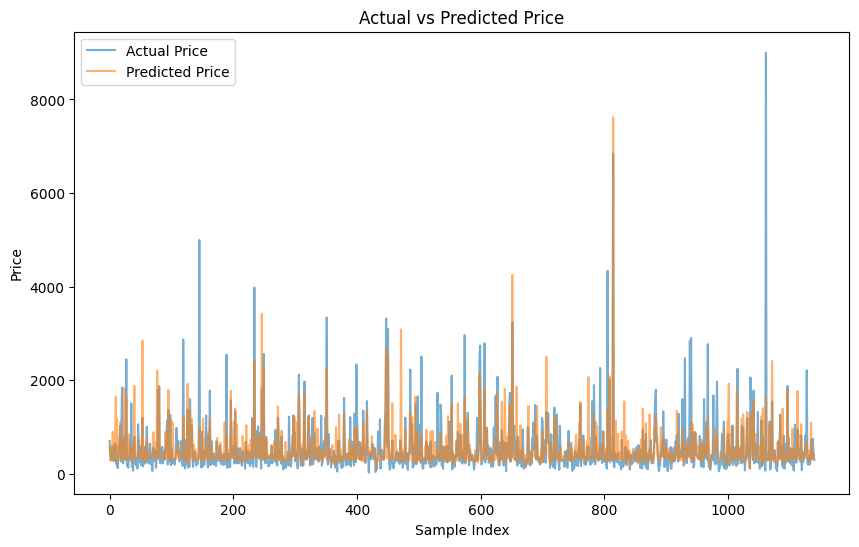

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(val_targets_unscaled, label='Actual Price', alpha=0.6)
plt.plot(val_predictions_unscaled, label='Predicted Price', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

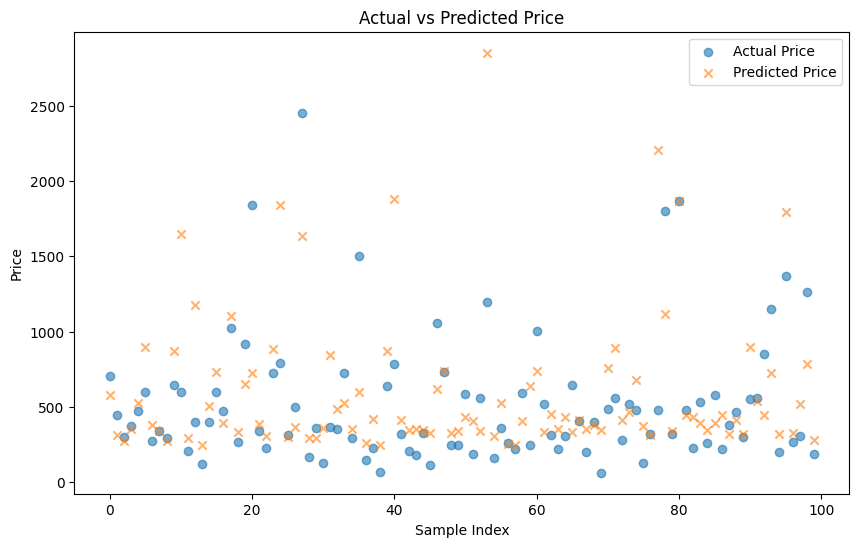

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(val_targets_unscaled[:100])), val_targets_unscaled[:100], label='Actual Price', alpha=0.6, marker='o')
plt.scatter(range(len(val_predictions_unscaled[:100])), val_predictions_unscaled[:100], label='Predicted Price', alpha=0.6, marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


In [74]:
df_fast['Price'].describe()

count     6236.000000
mean       530.155305
std        651.264190
min          0.000000
25%        243.000000
50%        365.000000
75%        561.000000
max      14100.000000
Name: Price, dtype: float64

In [75]:




test_fast[['Reviews', 'Ratings']] = scaler.fit_transform(test_fast[['Reviews', 'Ratings']])
price_scaler = StandardScaler()
test_fast[['Price']] = price_scaler.fit_transform(test_fast[['Price']])

X_numerical = test_fast[['Reviews', 'Ratings']].values
X_vectors = np.hstack((np.vstack(test_fast['Synopsis_fast'].values),
                       np.vstack(test_fast['auth_genre_title_Edition_fast'].values),
                       np.vstack(test_fast['BookCategory_fast'].values)))
X_test = np.hstack((X_numerical, X_vectors))

y_test = test['Price'].values

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [76]:
val_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


model.eval()
predictions = []
orginal = []
with torch.no_grad():
    for inputs, orgin in val_loader:
        outputs = model(inputs)
        orginal.append(orgin)
        predictions.extend(outputs.numpy())

predictions = np.array(predictions)
orginal = np.vstack(orginal)

predictions = price_scaler.inverse_transform(predictions)
orginal = price_scaler.inverse_transform(orginal)



In [77]:
print(predictions  )

[[ 260.102  ]
 [ 234.70702]
 [ 213.53665]
 [ 208.94177]
 [ 272.11252]
 [ 477.98877]
 [ 256.95493]
 [ 823.08057]
 [ 616.2086 ]
 [ 442.82983]
 [ 212.88405]
 [ 304.62656]
 [ 413.09177]
 [ 206.26315]
 [ 478.09647]
 [ 216.77425]
 [ 261.37466]
 [ 286.1739 ]
 [ 215.24484]
 [ 271.10303]
 [ 235.47162]
 [ 273.46555]
 [ 346.8071 ]
 [ 226.35762]
 [ 238.76196]
 [ 240.17331]
 [ 223.85861]
 [ 297.20984]
 [ 304.89508]
 [ 228.32227]
 [ 213.20525]
 [ 284.47122]
 [ 202.66211]
 [ 204.12967]
 [ 247.60172]
 [ 231.10925]
 [1021.7653 ]
 [ 530.22546]
 [ 219.79694]
 [ 696.32745]
 [ 443.53683]
 [ 239.05313]
 [ 240.75797]
 [ 214.96207]
 [ 216.45598]
 [ 239.66801]
 [ 240.05193]
 [ 204.53256]
 [ 330.53302]
 [ 277.11945]
 [ 463.19867]
 [ 405.5425 ]
 [ 431.08707]
 [ 214.95544]
 [ 211.76627]
 [ 214.32188]
 [ 292.73364]
 [ 537.3563 ]
 [ 286.4477 ]
 [ 331.6785 ]
 [ 223.8626 ]
 [ 240.21985]
 [ 285.73294]
 [ 221.24773]
 [ 216.15315]
 [ 215.13083]
 [ 321.63074]
 [ 218.2792 ]
 [ 213.12209]
 [ 278.8212 ]
 [ 244.92703]
 [ 211

In [78]:


class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

input_size = X_fast.shape[1]
linear_model = LinearRegressionModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)


In [79]:

X_train, X_val, y_train, y_val = train_test_split(X_fast, y_fast, test_size=0.2, random_state=42)

num_epochs = 200
batch_size = 32


train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    linear_model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = linear_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    linear_model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = linear_model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')


Epoch 1/200, Validation Loss: 0.7077
Epoch 2/200, Validation Loss: 0.6724
Epoch 3/200, Validation Loss: 0.6581
Epoch 4/200, Validation Loss: 0.6508
Epoch 5/200, Validation Loss: 0.6411
Epoch 6/200, Validation Loss: 0.6354
Epoch 7/200, Validation Loss: 0.6304
Epoch 8/200, Validation Loss: 0.6292
Epoch 9/200, Validation Loss: 0.6233
Epoch 10/200, Validation Loss: 0.6205
Epoch 11/200, Validation Loss: 0.6164
Epoch 12/200, Validation Loss: 0.6129
Epoch 13/200, Validation Loss: 0.6126
Epoch 14/200, Validation Loss: 0.6099
Epoch 15/200, Validation Loss: 0.6098
Epoch 16/200, Validation Loss: 0.6033
Epoch 17/200, Validation Loss: 0.6011
Epoch 18/200, Validation Loss: 0.5989
Epoch 19/200, Validation Loss: 0.5966
Epoch 20/200, Validation Loss: 0.5951
Epoch 21/200, Validation Loss: 0.5935
Epoch 22/200, Validation Loss: 0.5938
Epoch 23/200, Validation Loss: 0.5921
Epoch 24/200, Validation Loss: 0.5894
Epoch 25/200, Validation Loss: 0.5883
Epoch 26/200, Validation Loss: 0.5873
Epoch 27/200, Validat

In [80]:
linear_model.eval()
val_targets = []
val_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = linear_model(inputs)
        val_predictions.extend(outputs.numpy())
        val_targets.extend(targets.numpy())

val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

mse = mean_squared_error(val_targets, val_predictions)
mae = mean_absolute_error(val_targets, val_predictions)
r2 = r2_score(val_targets, val_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')



val_targets_unscaled = price_scaler.inverse_transform(val_targets)
val_predictions_unscaled = price_scaler.inverse_transform(val_predictions)

mse_unscaled = mean_squared_error(val_targets_unscaled, val_predictions_unscaled)
mae_unscaled = mean_absolute_error(val_targets_unscaled, val_predictions_unscaled)
r2_unscaled = r2_score(val_targets_unscaled, val_predictions_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled:.4f}')
print(f'Mean Absolute Error (unscaled): {mae_unscaled:.4f}')
print(f'R² Score (unscaled): {r2_unscaled:.4f}')

Mean Squared Error: 0.5626
Mean Absolute Error: 0.4378
R² Score: 0.2867
Mean Squared Error (unscaled): 13520.8516
Mean Absolute Error (unscaled): 67.8684
R² Score (unscaled): 0.2867


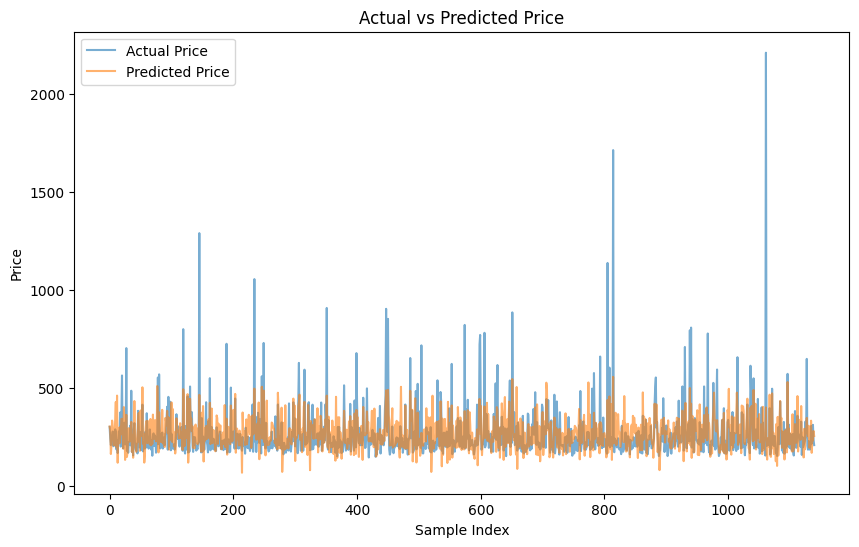

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(val_targets_unscaled, label='Actual Price', alpha=0.6)
plt.plot(val_predictions_unscaled, label='Predicted Price', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

In [82]:
val_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


model.eval()
predictions = []

with torch.no_grad():
    for inputs, orgin in val_loader:
        outputs = linear_model(inputs)

        predictions.extend(outputs.numpy())

predictions = np.array(predictions)

predictions = price_scaler.inverse_transform(predictions)



In [83]:
print(predictions)

[[328.70535 ]
 [248.2326  ]
 [207.04343 ]
 [116.74219 ]
 [272.92383 ]
 [327.3658  ]
 [368.60175 ]
 [530.8645  ]
 [528.3147  ]
 [451.7365  ]
 [241.03046 ]
 [271.54892 ]
 [401.5426  ]
 [181.40326 ]
 [429.2663  ]
 [217.38223 ]
 [322.75635 ]
 [322.30804 ]
 [234.21469 ]
 [279.93365 ]
 [238.10117 ]
 [363.29404 ]
 [331.14215 ]
 [252.40268 ]
 [274.5056  ]
 [217.34761 ]
 [268.7922  ]
 [339.00195 ]
 [321.6931  ]
 [257.81805 ]
 [237.22517 ]
 [286.18146 ]
 [180.79222 ]
 [164.68768 ]
 [244.08719 ]
 [234.87276 ]
 [487.33752 ]
 [524.50195 ]
 [303.4883  ]
 [408.4579  ]
 [413.40326 ]
 [208.51373 ]
 [260.98456 ]
 [293.25504 ]
 [266.04916 ]
 [256.2511  ]
 [334.33075 ]
 [175.90063 ]
 [319.45993 ]
 [299.9992  ]
 [436.25232 ]
 [373.7024  ]
 [461.12372 ]
 [224.12135 ]
 [184.00774 ]
 [218.6377  ]
 [298.94272 ]
 [407.71777 ]
 [282.90335 ]
 [413.6844  ]
 [216.71033 ]
 [277.13254 ]
 [394.87183 ]
 [241.85954 ]
 [220.27582 ]
 [196.62045 ]
 [351.3604  ]
 [304.26965 ]
 [295.81482 ]
 [236.29861 ]
 [284.19308 ]
 [189.

In [84]:
scaler = StandardScaler()
data_count[['Reviews', 'Ratings']] = scaler.fit_transform(data_count[['Reviews', 'Ratings']])
price_scaler = StandardScaler()
data_count[['Price']] = price_scaler.fit_transform(data_count[['Price']])

X_numerical = data_count[['Reviews', 'Ratings']].values
X_vectors = np.hstack((np.vstack(data_count['Synopsis_Vec'].values),
                       np.vstack(data_count['auth_genre_title_Edition_Vec'].values),
                       np.vstack(data_count['BookCategory_Vec'].values)))
X_count = np.hstack((X_numerical, X_vectors))

y_count = data_count['Price'].values

X_count = torch.tensor(X_count, dtype=torch.float32)
y_count = torch.tensor(y_count, dtype=torch.float32).view(-1, 1)





In [85]:



class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X_count.shape[1]
model = Net(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)






In [86]:

X_train, X_val, y_train, y_val = train_test_split(X_count, y_count, test_size=0.2, random_state=42)


num_epochs = 100
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')


Epoch 1/100, Validation Loss: 0.5979
Epoch 2/100, Validation Loss: 0.5328
Epoch 3/100, Validation Loss: 0.5380
Epoch 4/100, Validation Loss: 0.5221
Epoch 5/100, Validation Loss: 0.5219
Epoch 6/100, Validation Loss: 0.4934
Epoch 7/100, Validation Loss: 0.5052
Epoch 8/100, Validation Loss: 0.5333
Epoch 9/100, Validation Loss: 0.5010
Epoch 10/100, Validation Loss: 0.5050
Epoch 11/100, Validation Loss: 0.5239
Epoch 12/100, Validation Loss: 0.5206
Epoch 13/100, Validation Loss: 0.5179
Epoch 14/100, Validation Loss: 0.4963
Epoch 15/100, Validation Loss: 0.5287
Epoch 16/100, Validation Loss: 0.5134
Epoch 17/100, Validation Loss: 0.4899
Epoch 18/100, Validation Loss: 0.4972
Epoch 19/100, Validation Loss: 0.5118
Epoch 20/100, Validation Loss: 0.5096
Epoch 21/100, Validation Loss: 0.5002
Epoch 22/100, Validation Loss: 0.5244
Epoch 23/100, Validation Loss: 0.5141
Epoch 24/100, Validation Loss: 0.4919
Epoch 25/100, Validation Loss: 0.4997
Epoch 26/100, Validation Loss: 0.5019
Epoch 27/100, Validat

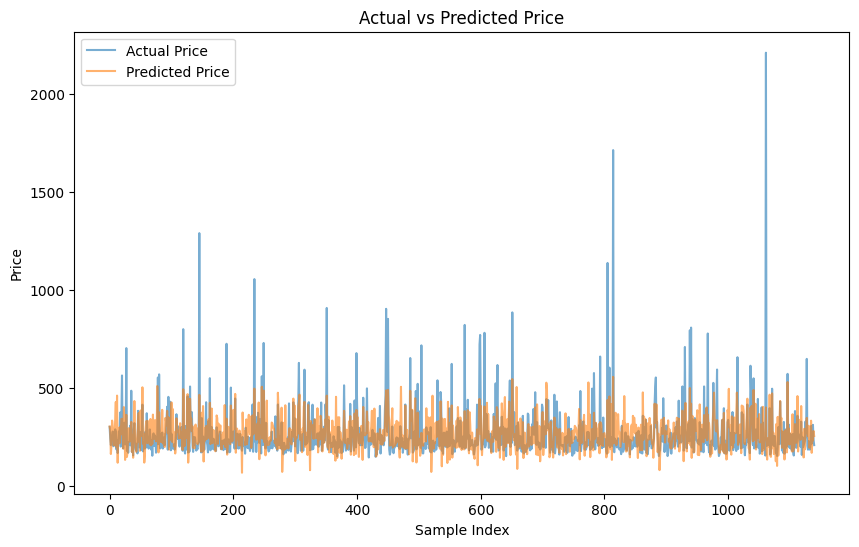

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(val_targets_unscaled, label='Actual Price', alpha=0.6)
plt.plot(val_predictions_unscaled, label='Predicted Price', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

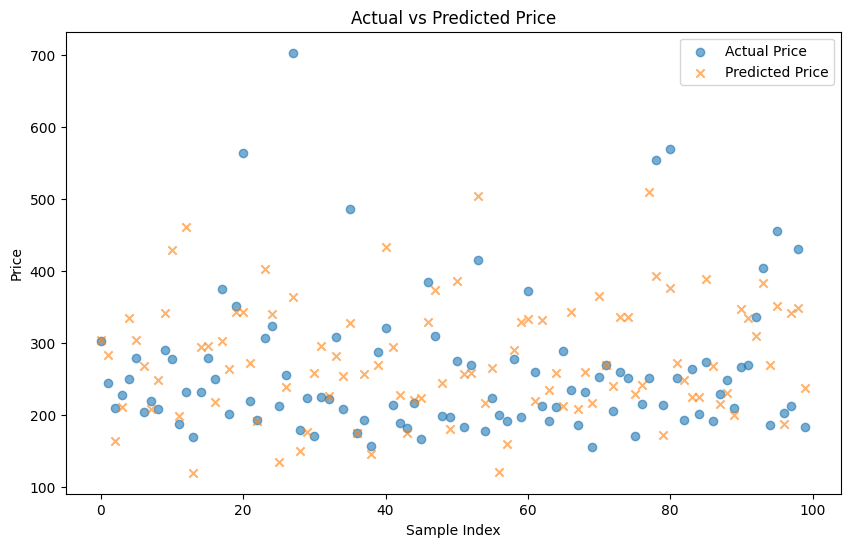

In [88]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(val_targets_unscaled[:100])), val_targets_unscaled[:100], label='Actual Price', alpha=0.6, marker='o')
plt.scatter(range(len(val_predictions_unscaled[:100])), val_predictions_unscaled[:100], label='Predicted Price', alpha=0.6, marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


In [89]:



model.eval()
val_targets = []
val_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        val_predictions.extend(outputs.numpy())
        val_targets.extend(targets.numpy())

val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

mse = mean_squared_error(val_targets, val_predictions)
mae = mean_absolute_error(val_targets, val_predictions)
r2 = r2_score(val_targets, val_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

val_targets_unscaled = price_scaler.inverse_transform(val_targets)
val_predictions_unscaled = price_scaler.inverse_transform(val_predictions)

mse_unscaled = mean_squared_error(val_targets_unscaled, val_predictions_unscaled)
mae_unscaled = mean_absolute_error(val_targets_unscaled, val_predictions_unscaled)
r2_unscaled = r2_score(val_targets_unscaled, val_predictions_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled:.4f}')
print(f'Mean Absolute Error (unscaled): {mae_unscaled:.4f}')
print(f'R² Score (unscaled): {r2_unscaled:.4f}')

Mean Squared Error: 0.4955
Mean Absolute Error: 0.3467
R² Score: 0.3718
Mean Squared Error (unscaled): 225318.7812
Mean Absolute Error (unscaled): 233.7718
R² Score (unscaled): 0.3718


In [90]:




test_count[['Reviews', 'Ratings']] = scaler.fit_transform(test_count[['Reviews', 'Ratings']])
price_scaler = StandardScaler()
test_count[['Price']] = price_scaler.fit_transform(test_count[['Price']])

X_numerical = test_count[['Reviews', 'Ratings']].values
X_vectors = np.hstack((np.vstack(test_count['Synopsis_Vec'].values),
                       np.vstack(test_count['auth_genre_title_Edition_Vec'].values),
                       np.vstack(test_count['BookCategory_Vec'].values)))
X_test = np.hstack((X_numerical, X_vectors))

y_test = test['Price'].values

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [91]:
val_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


model.eval()
predictions = []

with torch.no_grad():
    for inputs, orgin in val_loader:
        outputs = model(inputs)

        predictions.extend(outputs.numpy())

predictions = np.vstack(predictions)

predictions = price_scaler.inverse_transform(predictions)



In [92]:
print(predictions)

[[ 233.70715]
 [ 197.63431]
 [ 195.82669]
 [ 196.2091 ]
 [ 334.08862]
 [ 530.3834 ]
 [ 343.6721 ]
 [ 894.699  ]
 [ 774.9045 ]
 [ 392.73865]
 [ 198.29916]
 [ 337.58228]
 [ 253.63185]
 [ 193.93646]
 [ 339.33444]
 [ 187.22269]
 [ 262.2171 ]
 [ 248.38927]
 [ 196.72223]
 [ 258.78873]
 [ 262.71   ]
 [ 295.19733]
 [ 246.18929]
 [ 225.17183]
 [ 216.75557]
 [ 241.97327]
 [ 252.52174]
 [ 218.72052]
 [ 238.582  ]
 [ 221.78357]
 [ 281.5799 ]
 [ 269.1172 ]
 [ 168.85559]
 [ 207.33182]
 [ 237.24377]
 [ 232.98701]
 [ 375.61115]
 [ 493.87775]
 [ 260.9861 ]
 [ 379.0191 ]
 [ 326.4634 ]
 [ 193.01144]
 [ 324.1637 ]
 [ 196.05403]
 [ 207.93451]
 [ 252.92218]
 [ 179.3623 ]
 [ 199.3381 ]
 [ 184.95041]
 [ 228.30867]
 [ 645.13837]
 [ 282.2162 ]
 [ 773.31354]
 [ 193.52283]
 [ 219.18983]
 [ 202.84894]
 [ 282.2133 ]
 [ 345.2732 ]
 [ 235.67221]
 [ 272.81448]
 [ 198.12976]
 [ 214.01138]
 [ 332.11176]
 [ 240.97202]
 [ 186.26324]
 [ 196.922  ]
 [ 260.26456]
 [ 227.91132]
 [ 215.8885 ]
 [ 237.59488]
 [ 289.88016]
 [ 237

In [93]:


class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

input_size = X_count.shape[1]
linear_model = LinearRegressionModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)


In [94]:
num_epochs = 200
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    linear_model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = linear_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    linear_model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = linear_model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')


Epoch 1/200, Validation Loss: 0.6060
Epoch 2/200, Validation Loss: 0.5872
Epoch 3/200, Validation Loss: 0.5685
Epoch 4/200, Validation Loss: 0.5697
Epoch 5/200, Validation Loss: 0.5714
Epoch 6/200, Validation Loss: 0.5734
Epoch 7/200, Validation Loss: 0.5706
Epoch 8/200, Validation Loss: 0.5812
Epoch 9/200, Validation Loss: 0.5777
Epoch 10/200, Validation Loss: 0.5813
Epoch 11/200, Validation Loss: 0.5832
Epoch 12/200, Validation Loss: 0.5907
Epoch 13/200, Validation Loss: 0.5892
Epoch 14/200, Validation Loss: 0.5906
Epoch 15/200, Validation Loss: 0.5966
Epoch 16/200, Validation Loss: 0.6015
Epoch 17/200, Validation Loss: 0.5977
Epoch 18/200, Validation Loss: 0.6020
Epoch 19/200, Validation Loss: 0.6163
Epoch 20/200, Validation Loss: 0.6112
Epoch 21/200, Validation Loss: 0.6122
Epoch 22/200, Validation Loss: 0.6187
Epoch 23/200, Validation Loss: 0.6070
Epoch 24/200, Validation Loss: 0.6164
Epoch 25/200, Validation Loss: 0.6173
Epoch 26/200, Validation Loss: 0.6164
Epoch 27/200, Validat

In [95]:
linear_model.eval()
val_targets = []
val_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = linear_model(inputs)
        val_predictions.extend(outputs.numpy())
        val_targets.extend(targets.numpy())

val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

mse = mean_squared_error(val_targets, val_predictions)
mae = mean_absolute_error(val_targets, val_predictions)
r2 = r2_score(val_targets, val_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')



val_targets_unscaled = price_scaler.inverse_transform(val_targets)
val_predictions_unscaled = price_scaler.inverse_transform(val_predictions)

mse_unscaled = mean_squared_error(val_targets_unscaled, val_predictions_unscaled)
mae_unscaled = mean_absolute_error(val_targets_unscaled, val_predictions_unscaled)
r2_unscaled = r2_score(val_targets_unscaled, val_predictions_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled:.4f}')
print(f'Mean Absolute Error (unscaled): {mae_unscaled:.4f}')
print(f'R² Score (unscaled): {r2_unscaled:.4f}')

Mean Squared Error: 0.6821
Mean Absolute Error: 0.5342
R² Score: 0.1353
Mean Squared Error (unscaled): 16390.6621
Mean Absolute Error (unscaled): 82.8115
R² Score (unscaled): 0.1353


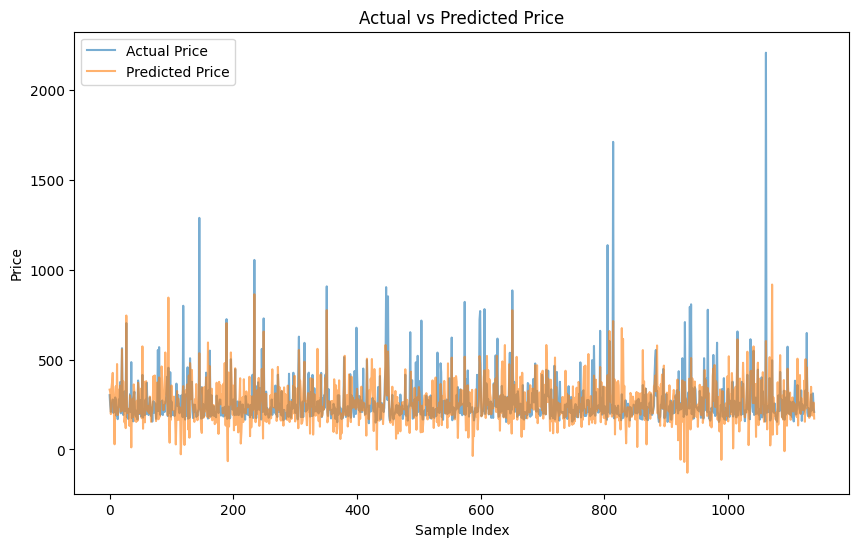

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(val_targets_unscaled, label='Actual Price', alpha=0.6)
plt.plot(val_predictions_unscaled, label='Predicted Price', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

In [97]:
val_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


model.eval()
predictions = []

with torch.no_grad():
    for inputs, orgin in val_loader:
        outputs = linear_model(inputs)

        predictions.extend(outputs.numpy())

predictions = np.vstack(predictions)

predictions = price_scaler.inverse_transform(predictions)



In [98]:
print(predictions)

[[ 267.12814 ]
 [ 248.93834 ]
 [ 127.892685]
 [ 277.34763 ]
 [ 253.31909 ]
 [ 248.22806 ]
 [ 357.12042 ]
 [ 574.89197 ]
 [ 631.51776 ]
 [ 484.52383 ]
 [ 246.86395 ]
 [ 358.0719  ]
 [ 319.24258 ]
 [ 183.12836 ]
 [ 165.13307 ]
 [ 217.87335 ]
 [ 325.41577 ]
 [ 198.81479 ]
 [ 215.64633 ]
 [ 206.55026 ]
 [ 204.59717 ]
 [ 402.65945 ]
 [ 149.2807  ]
 [ 211.71243 ]
 [ 233.19101 ]
 [ 267.70178 ]
 [ 263.41708 ]
 [ 324.17133 ]
 [ 230.08493 ]
 [ 143.28024 ]
 [ 340.97473 ]
 [ 435.8073  ]
 [ 187.40892 ]
 [ 142.54102 ]
 [ 186.25906 ]
 [ 155.77475 ]
 [ 473.36847 ]
 [ 447.23706 ]
 [ 387.11856 ]
 [ 345.68314 ]
 [ 190.28937 ]
 [ 250.33    ]
 [ 304.08777 ]
 [ 133.48503 ]
 [ 215.31454 ]
 [  91.84769 ]
 [ 220.43341 ]
 [ 142.8856  ]
 [ 179.87462 ]
 [ 359.5562  ]
 [ 398.8656  ]
 [ 245.53413 ]
 [ 353.20126 ]
 [ 281.32895 ]
 [ 161.93033 ]
 [ 281.03445 ]
 [ 312.0261  ]
 [ 260.4736  ]
 [ 350.60745 ]
 [ 273.8644  ]
 [ 214.1179  ]
 [ 319.05722 ]
 [ 320.28033 ]
 [ 286.09195 ]
 [   9.252563]
 [ 210.81427 ]
 [ 279.837

In [99]:


scaler = StandardScaler()
data_bert[['Reviews', 'Ratings']] = scaler.fit_transform(data_bert[['Reviews', 'Ratings']])
price_scaler = StandardScaler()
data_bert[['Price']] = price_scaler.fit_transform(data_bert[['Price']])

X_numerical = data_bert[['Reviews', 'Ratings']].values
X_vectors = np.hstack((np.vstack(data_bert['Synopsis_bert'].values),
                       np.vstack(data_bert['auth_genre_title_Edition_bert'].values),
                       np.vstack(data_bert['BookCategory_bert'].values)))
X_bert = np.hstack((X_numerical, X_vectors))

y_bert = data_bert['Price'].values

X_bert = torch.tensor(X_bert, dtype=torch.float32)
y_bert = torch.tensor(y_bert, dtype=torch.float32).view(-1, 1)

NameError: name 'data_bert' is not defined

In [ ]:


class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X.shape[1]
model = Net(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)






In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_bert, y_bert, test_size=0.2, random_state=42)


num_epochs = 100
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(val_targets_unscaled, label='Actual Price', alpha=0.6)
plt.plot(val_predictions_unscaled, label='Predicted Price', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(val_targets_unscaled[:100])), val_targets_unscaled[:100], label='Actual Price', alpha=0.6, marker='o')
plt.scatter(range(len(val_predictions_unscaled[:100])), val_predictions_unscaled[:100], label='Predicted Price', alpha=0.6, marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


In [ ]:


model.eval()
val_targets = []
val_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        val_predictions.extend(outputs.numpy())
        val_targets.extend(targets.numpy())

val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

mse = mean_squared_error(val_targets, val_predictions)
mae = mean_absolute_error(val_targets, val_predictions)
r2 = r2_score(val_targets, val_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

val_targets_unscaled = price_scaler.inverse_transform(val_targets)
val_predictions_unscaled = price_scaler.inverse_transform(val_predictions)

mse_unscaled = mean_squared_error(val_targets_unscaled, val_predictions_unscaled)
mae_unscaled = mean_absolute_error(val_targets_unscaled, val_predictions_unscaled)
r2_unscaled = r2_score(val_targets_unscaled, val_predictions_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled:.4f}')
print(f'Mean Absolute Error (unscaled): {mae_unscaled:.4f}')
print(f'R² Score (unscaled): {r2_unscaled:.4f}')

In [ ]:



scaler = StandardScaler()
test_bert[['Reviews', 'Ratings']] = scaler.fit_transform(test_bert[['Reviews', 'Ratings']])
price_scaler = StandardScaler()
test_bert[['Price']] = price_scaler.fit_transform(test_bert[['Price']])

X_numerical = test_bert[['Reviews', 'Ratings']].values
X_vectors = np.hstack((np.vstack(test_bert['Synopsis_bert'].values),
                       np.vstack(test_bert['auth_genre_title_Edition_bert'].values),
                       np.vstack(test_bert['BookCategory_bert'].values)))
X_test = np.hstack((X_numerical, X_vectors))

y_test = test['Price'].values

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
val_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


model.eval()
predictions = []

with torch.no_grad():
    for inputs, orgin in val_loader:
        outputs = model(inputs)

        predictions.extend(outputs.numpy())

predictions = np.vstack(predictions)

predictions = price_scaler.inverse_transform(predictions)



In [ ]:
print(predictions)

In [ ]:

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

input_size = X.shape[1]
linear_model = LinearRegressionModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)


In [ ]:
num_epochs = 200
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    linear_model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = linear_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    linear_model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = linear_model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')


In [ ]:
linear_model.eval()
val_targets = []
val_predictions = []

with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = linear_model(inputs)
        val_predictions.extend(outputs.numpy())
        val_targets.extend(targets.numpy())

val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

mse = mean_squared_error(val_targets, val_predictions)
mae = mean_absolute_error(val_targets, val_predictions)
r2 = r2_score(val_targets, val_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')



val_targets_unscaled = price_scaler.inverse_transform(val_targets)
val_predictions_unscaled = price_scaler.inverse_transform(val_predictions)

mse_unscaled = mean_squared_error(val_targets_unscaled, val_predictions_unscaled)
mae_unscaled = mean_absolute_error(val_targets_unscaled, val_predictions_unscaled)
r2_unscaled = r2_score(val_targets_unscaled, val_predictions_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled:.4f}')
print(f'Mean Absolute Error (unscaled): {mae_unscaled:.4f}')
print(f'R² Score (unscaled): {r2_unscaled:.4f}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(val_targets_unscaled, label='Actual Price', alpha=0.6)
plt.plot(val_predictions_unscaled, label='Predicted Price', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

In [ ]:
val_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


model.eval()
predictions = []

with torch.no_grad():
    for inputs, orgin in val_loader:
        outputs = linear_model(inputs)

        predictions.append(outputs.numpy())

predictions = np.vstack(predictions)

predictions = price_scaler.inverse_transform(predictions)



In [ ]:
print(predictions)